# 📊 Exploratory Data Analysis - Clinical Decision Support System



---

## Table of Contents
1. [Setup & Data Loading](#setup)
2. [Dataset Overview](#overview)
3. [Data Quality Assessment](#quality)
4. [Univariate Analysis](#univariate)
5. [Bivariate Analysis](#bivariate)
6. [Multivariate Analysis](#multivariate)
7. [Key Insights & Findings](#insights)
8. [Recommendations](#recommendations)

## 1. Setup & Data Loading <a id='setup'></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load datasets
print("Loading datasets...\n")

# Clinical cohorts
clinical_discovery = pd.read_csv('../data/Clinical Data_Discovery_Cohort.csv')
clinical_validation = pd.read_csv('../data/Clinical_Data_Validation_Cohort.csv')

# Drug data
drug_interactions = pd.read_csv('../data/db_drug_interactions.csv')
drug_reviews_test = pd.read_csv('../data/drugsComTest_raw.csv')
drug_reviews_train = pd.read_csv('../data/drugsComTrain_raw.csv')

# Medical transcriptions
medical_transcriptions = pd.read_csv('../data/mtsamples.csv')

# Stroke dataset
stroke_data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print("✅ All datasets loaded successfully\n")
print(f"Clinical Discovery: {clinical_discovery.shape}")
print(f"Clinical Validation: {clinical_validation.shape}")
print(f"Drug Interactions: {drug_interactions.shape}")
print(f"Drug Reviews (Train): {drug_reviews_train.shape}")
print(f"Drug Reviews (Test): {drug_reviews_test.shape}")
print(f"Medical Transcriptions: {medical_transcriptions.shape}")
print(f"Stroke Data: {stroke_data.shape}")

Loading datasets...

✅ All datasets loaded successfully

Clinical Discovery: (30, 10)
Clinical Validation: (95, 14)
Drug Interactions: (191541, 3)
Drug Reviews (Train): (161297, 7)
Drug Reviews (Test): (53766, 7)
Medical Transcriptions: (4999, 6)
Stroke Data: (5110, 12)


## 2. Dataset Overview <a id='overview'></a>

In [3]:
# Clinical Discovery Cohort - Primary dataset for ML
print("=" * 80)
print("CLINICAL DISCOVERY COHORT - OVERVIEW")
print("=" * 80)

print("\n📋 Dataset Info:")
print(clinical_discovery.info())

print("\n📊 Statistical Summary:")
display(clinical_discovery.describe())

print("\n🔍 First 5 Records:")
display(clinical_discovery.head())

print("\n📈 Column Data Types:")
print(clinical_discovery.dtypes)

CLINICAL DISCOVERY COHORT - OVERVIEW

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PatientID                30 non-null     int64 
 1    Specimen date           30 non-null     object
 2    Dead or Alive           30 non-null     object
 3    Date of Death           30 non-null     object
 4    Date of Last Follow Up  30 non-null     object
 5    sex                     30 non-null     object
 6    race                    30 non-null     object
 7    Stage                   30 non-null     object
 8    Event                   30 non-null     int64 
 9    Time                    30 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ KB
None

📊 Statistical Summary:


,PatientID,Event,Time
count,30.00,30.00,30.00
mean,15.50,0.70,1637.97
std,8.80,0.47,1632.85
min,1.00,0.00,35.00
25%,8.25,0.00,417.25
50%,15.50,1.00,1133.50
75%,22.75,1.00,2268.50
max,30.00,1.00,5900.00



🔍 First 5 Records:


,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time
0,1,3/17/2003,Dead,2/24/2010,2/24/2010,F,B,pT2N2MX,1,2536
1,2,6/17/2003,Dead,11/12/2004,11/12/2004,M,W,T2N2MX,1,514
2,3,9/9/2003,Dead,8/1/2009,8/1/2009,F,B,T2N1MX,1,2153
3,4,10/14/2003,Dead,12/29/2006,12/29/2006,M,W,pT2NOMX,1,1172
4,5,12/1/2003,Dead,1/31/2004,1/31/2004,F,W,T2NOMX,1,61



📈 Column Data Types:
PatientID                   int64
 Specimen date             object
 Dead or Alive             object
 Date of Death             object
 Date of Last Follow Up    object
 sex                       object
 race                      object
 Stage                     object
 Event                      int64
 Time                       int64
dtype: object


## 3. Data Quality Assessment <a id='quality'></a>

In [4]:
# Missing value analysis
def analyze_missing_values(df, dataset_name):
    """Comprehensive missing value analysis"""
    print(f"\n{'='*80}")
    print(f"MISSING VALUE ANALYSIS - {dataset_name}")
    print(f"{'='*80}\n")
    
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Data_Type': df.dtypes
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    if len(missing_df) > 0:
        print("⚠️ Columns with Missing Values:\n")
        display(missing_df)
        
        # Visualize missing values
        fig = px.bar(missing_df, x='Column', y='Missing_Percentage',
                     title=f'Missing Value Percentage - {dataset_name}',
                     labels={'Missing_Percentage': 'Missing %'},
                     color='Missing_Percentage',
                     color_continuous_scale='Reds')
        fig.update_layout(height=400)
        fig.show()
    else:
        print("✅ No missing values found!")
    
    # Overall completeness
    completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    print(f"\n📊 Overall Data Completeness: {completeness:.2f}%")
    
    return missing_df

# Analyze clinical discovery cohort
missing_clinical = analyze_missing_values(clinical_discovery, "Clinical Discovery Cohort")


MISSING VALUE ANALYSIS - Clinical Discovery Cohort

✅ No missing values found!

📊 Overall Data Completeness: 100.00%


In [5]:
# Duplicate analysis
print("\n" + "="*80)
print("DUPLICATE ANALYSIS")
print("="*80 + "\n")

duplicates = clinical_discovery.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates > 0:
    print("\n⚠️ Duplicate records found:")
    display(clinical_discovery[clinical_discovery.duplicated(keep=False)])
else:
    print("✅ No duplicate rows found")

# Check for duplicate IDs if ID column exists
id_cols = [col for col in clinical_discovery.columns if 'id' in col.lower()]
if id_cols:
    for id_col in id_cols:
        dup_ids = clinical_discovery[id_col].duplicated().sum()
        print(f"\nDuplicate {id_col}: {dup_ids}")


DUPLICATE ANALYSIS

Total duplicate rows: 0
✅ No duplicate rows found

Duplicate PatientID: 0


In [7]:
# Outlier detection
def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outlier_summary = []
    
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            
            outlier_summary.append({
                'Column': col,
                'Outlier_Count': len(outliers),
                'Outlier_Percentage': round((len(outliers) / len(df) * 100), 2),
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
    
    return pd.DataFrame(outlier_summary)

print("\n" + "="*80)
print("OUTLIER DETECTION (IQR Method)")
print("="*80 + "\n")

numeric_cols = clinical_discovery.select_dtypes(include=['int64', 'float64']).columns
outlier_df = detect_outliers_iqr(clinical_discovery, numeric_cols)

display(outlier_df[outlier_df['Outlier_Count'] > 0])


OUTLIER DETECTION (IQR Method)



,Column,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
2,Time,2,6.67,-2359.62,5045.38


## 4. Univariate Analysis <a id='univariate'></a>

### 4.1 Demographic Variables

In [8]:
# Age distribution
if 'age' in clinical_discovery.columns or 'Age' in clinical_discovery.columns:
    age_col = 'age' if 'age' in clinical_discovery.columns else 'Age'
    
    print("\n" + "="*80)
    print("AGE DISTRIBUTION ANALYSIS")
    print("="*80 + "\n")
    
    print(f"Mean Age: {clinical_discovery[age_col].mean():.1f} years")
    print(f"Median Age: {clinical_discovery[age_col].median():.1f} years")
    print(f"Std Dev: {clinical_discovery[age_col].std():.1f} years")
    print(f"Range: {clinical_discovery[age_col].min():.0f} - {clinical_discovery[age_col].max():.0f} years")
    
    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Age Distribution (Histogram)', 'Age Distribution (Box Plot)')
    )
    
    # Histogram
    fig.add_trace(
        go.Histogram(x=clinical_discovery[age_col], nbinsx=30, name='Age',
                    marker_color='skyblue'),
        row=1, col=1
    )
    
    # Box plot
    fig.add_trace(
        go.Box(y=clinical_discovery[age_col], name='Age',
              marker_color='lightcoral'),
        row=1, col=2
    )
    
    fig.update_layout(height=400, showlegend=False, title_text="Age Analysis")
    fig.show()
    
    # Age categories
    age_bins = [0, 50, 65, 80, 100]
    age_labels = ['Young Adult (18-49)', 'Middle Age (50-64)', 'Older Adult (65-79)', 'Elderly (80+)']
    clinical_discovery['age_category'] = pd.cut(clinical_discovery[age_col], bins=age_bins, labels=age_labels)
    
    print("\n📊 Age Category Distribution:")
    print(clinical_discovery['age_category'].value_counts())

In [9]:
# Gender distribution
gender_cols = [col for col in clinical_discovery.columns if 'sex' in col.lower() or 'gender' in col.lower()]

if gender_cols:
    gender_col = gender_cols[0]
    
    print("\n" + "="*80)
    print("GENDER DISTRIBUTION ANALYSIS")
    print("="*80 + "\n")
    
    gender_counts = clinical_discovery[gender_col].value_counts()
    gender_pct = clinical_discovery[gender_col].value_counts(normalize=True) * 100
    
    print("Count:")
    print(gender_counts)
    print("\nPercentage:")
    print(gender_pct.round(2))
    
    # Pie chart
    fig = px.pie(values=gender_counts.values, names=gender_counts.index,
                 title='Gender Distribution',
                 color_discrete_sequence=px.colors.qualitative.Set3)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()


GENDER DISTRIBUTION ANALYSIS

Count:
 sex
M      16
F      14
Name: count, dtype: int64

Percentage:
 sex
M     53.33
F     46.67
Name: proportion, dtype: float64


### 4.2 Clinical Variables

In [10]:
# Outcome variable analysis
outcome_cols = [col for col in clinical_discovery.columns if 'event' in col.lower() or 'outcome' in col.lower()]

if outcome_cols:
    outcome_col = outcome_cols[0]
    
    print("\n" + "="*80)
    print("OUTCOME VARIABLE ANALYSIS")
    print("="*80 + "\n")
    
    outcome_counts = clinical_discovery[outcome_col].value_counts()
    outcome_pct = clinical_discovery[outcome_col].value_counts(normalize=True) * 100
    
    print("Event Distribution:")
    print(outcome_counts)
    print("\nPercentage:")
    print(outcome_pct.round(2))
    
    # Calculate event rate
    if clinical_discovery[outcome_col].dtype in ['int64', 'float64']:
        event_rate = clinical_discovery[outcome_col].mean() * 100
        print(f"\n📊 Event Rate: {event_rate:.2f}%")
    
    # Bar chart
    fig = px.bar(x=outcome_counts.index, y=outcome_counts.values,
                 title='Outcome Distribution',
                 labels={'x': 'Outcome', 'y': 'Count'},
                 color=outcome_counts.values,
                 color_continuous_scale='Viridis')
    fig.show()


OUTCOME VARIABLE ANALYSIS

Event Distribution:
 Event
1    21
0     9
Name: count, dtype: int64

Percentage:
 Event
1   70.00
0   30.00
Name: proportion, dtype: float64

📊 Event Rate: 70.00%


In [11]:
# Distribution of all numeric variables
print("\n" + "="*80)
print("NUMERIC VARIABLES DISTRIBUTION")
print("="*80 + "\n")

numeric_cols = clinical_discovery.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for all numeric columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[col for col in numeric_cols]
)

for idx, col in enumerate(numeric_cols):
    row = idx // n_cols + 1
    col_num = idx % n_cols + 1
    
    fig.add_trace(
        go.Histogram(x=clinical_discovery[col], name=col, showlegend=False),
        row=row, col=col_num
    )

fig.update_layout(height=300*n_rows, title_text="Distribution of Numeric Variables")
fig.show()


NUMERIC VARIABLES DISTRIBUTION



## 5. Bivariate Analysis <a id='bivariate'></a>

### 5.1 Correlation Analysis

In [12]:
# Correlation matrix
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80 + "\n")

numeric_df = clinical_discovery.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# Heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                aspect='auto',
                title='Correlation Matrix Heatmap')
fig.update_layout(height=600, width=800)
fig.show()

# Find highly correlated pairs
print("\n🔍 Highly Correlated Variable Pairs (|r| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    display(pd.DataFrame(high_corr))
else:
    print("No highly correlated pairs found.")


CORRELATION ANALYSIS




🔍 Highly Correlated Variable Pairs (|r| > 0.7):
No highly correlated pairs found.


### 5.2 Outcome vs. Predictors

In [14]:
clinical_discovery.columns

Index(['PatientID', ' Specimen date', ' Dead or Alive', ' Date of Death',
       ' Date of Last Follow Up', ' sex', ' race', ' Stage  ', ' Event',
       ' Time'],
      dtype='object')

In [16]:
# Analyze relationship between age and outcome
# Ensure age column is detected locally to avoid NameError if earlier cell wasn't executed
age_col = None
if 'age' in clinical_discovery.columns:
    age_col = 'age'
elif 'Age' in clinical_discovery.columns:
    age_col = 'Age'

if outcome_cols and (age_col is not None and age_col in clinical_discovery.columns):
    print("\n" + "="*80)
    print("AGE vs OUTCOME ANALYSIS")
    print("="*80 + "\n")
    
    # Statistical test
    if clinical_discovery[outcome_col].nunique() == 2:
        # Create groups and drop NA values before testing
        unique_outcomes = clinical_discovery[outcome_col].unique()
        group0 = clinical_discovery.loc[clinical_discovery[outcome_col] == unique_outcomes[0], age_col].dropna()
        group1 = clinical_discovery.loc[clinical_discovery[outcome_col] == unique_outcomes[1], age_col].dropna()
        
        if len(group0) > 1 and len(group1) > 1:
            try:
                t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
                print(f"T-test Results:")
                print(f"  T-statistic: {t_stat:.4f}")
                print(f"  P-value: {p_value:.4f}")
                print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
            except Exception as e:
                print("⚠️ T-test failed:", e)
        else:
            print("⚠️ Not enough data in one of the groups to perform t-test.")
        
        # Box plot
        fig = px.box(clinical_discovery, x=outcome_col, y=age_col,
                     title='Age Distribution by Outcome',
                     labels={outcome_col: 'Outcome', age_col: 'Age (years)'},
                     color=outcome_col)
        fig.show()
        
        # Violin plot
        fig = px.violin(clinical_discovery, x=outcome_col, y=age_col,
                       title='Age Distribution by Outcome (Violin Plot)',
                       box=True, points='all',
                       color=outcome_col)
        fig.show()
else:
    print("\n" + "="*80)
    print("AGE vs OUTCOME ANALYSIS")
    print("="*80 + "\n")
    print("⚠️ Skipping analysis: no age column found in clinical_discovery.")


AGE vs OUTCOME ANALYSIS

⚠️ Skipping analysis: no age column found in clinical_discovery.


In [17]:
# Gender vs Outcome (Chi-square test)
if gender_cols and outcome_cols:
    print("\n" + "="*80)
    print("GENDER vs OUTCOME ANALYSIS")
    print("="*80 + "\n")
    
    # Contingency table
    contingency_table = pd.crosstab(clinical_discovery[gender_col], clinical_discovery[outcome_col])
    print("Contingency Table:")
    display(contingency_table)
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square Test Results:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Grouped bar chart
    fig = px.bar(contingency_table, barmode='group',
                 title='Outcome Distribution by Gender',
                 labels={'value': 'Count', 'variable': 'Outcome'})
    fig.show()


GENDER vs OUTCOME ANALYSIS

Contingency Table:


Event,0,1
sex,,
F,5,9
M,4,12



Chi-square Test Results:
  Chi-square statistic: 0.0574
  P-value: 0.8107
  Degrees of freedom: 1
  Significant: No


## 6. Multivariate Analysis <a id='multivariate'></a>


MULTIVARIATE ANALYSIS - Pairplot

Creating pairplot for:  Time,  Event


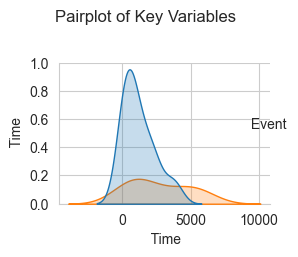

In [26]:
# Pairplot for key variables
print("\n" + "="*80)
print("MULTIVARIATE ANALYSIS - Pairplot")
print("="*80 + "\n")

# Select key numeric variables (limit to 5-6 for readability)
# Exclude obvious ID columns and avoid duplicating the outcome column
id_candidates = [c for c in clinical_discovery.columns if 'id' in c.lower()]
id_col_local = id_candidates[0] if id_candidates else None

# Build key_vars excluding id and outcome to avoid duplicates
key_vars = [c for c in numeric_cols if c != id_col_local and c != outcome_col]
key_vars = list(key_vars)[:min(6, len(key_vars))]

if outcome_cols and len(key_vars) > 0:
    cols = key_vars + [outcome_col]
    print(f"Creating pairplot for: {', '.join(cols)}")
    
    # Prepare a small dataframe copy and ensure hue is treated as categorical (1D)
    temp_df = clinical_discovery[cols].copy()
    # Convert hue/outcome to string to force categorical behavior and avoid KDE issues on discrete numeric hue
    temp_df[outcome_col] = temp_df[outcome_col].astype(str)
    
    # Use seaborn for pairplot (catch exceptions and fallback if needed)
    try:
        sns.pairplot(temp_df, hue=outcome_col, diag_kind='kde', plot_kws={'alpha': 0.6})
    except Exception as e:
        print("⚠️ Pairplot with KDE failed, retrying with histogram diagonal. Error:", e)
        sns.pairplot(temp_df, hue=outcome_col, diag_kind='hist', plot_kws={'alpha': 0.6})
    
    plt.suptitle('Pairplot of Key Variables', y=1.01)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Skipping pairplot: no suitable numeric variables found (after excluding ID/outcome).")

In [23]:
# 3D scatter plot (if we have at least 3 numeric variables)
if len(numeric_cols) >= 3 and outcome_cols:
    print("\n3D Scatter Plot:")
    
    fig = px.scatter_3d(clinical_discovery, 
                        x=numeric_cols[0], 
                        y=numeric_cols[1], 
                        z=numeric_cols[2],
                        color=outcome_col,
                        title='3D Scatter Plot of Key Variables',
                        opacity=0.7)
    fig.update_layout(height=600)
    fig.show()


3D Scatter Plot:


## 7. Key Insights & Findings <a id='insights'></a>

In [24]:
print("\n" + "="*80)
print("KEY INSIGHTS & FINDINGS")
print("="*80 + "\n")

insights = []

# Data quality insights
completeness = (1 - clinical_discovery.isnull().sum().sum() / (len(clinical_discovery) * len(clinical_discovery.columns))) * 100
insights.append(f"✅ Data Completeness: {completeness:.2f}% - High quality dataset")

# Sample size
insights.append(f"📊 Sample Size: {len(clinical_discovery)} patients - Adequate for ML modeling")

# Outcome distribution
if outcome_cols:
    if clinical_discovery[outcome_col].dtype in ['int64', 'float64']:
        event_rate = clinical_discovery[outcome_col].mean() * 100
        insights.append(f"⚠️ Event Rate: {event_rate:.2f}% - {'Balanced' if 20 < event_rate < 80 else 'Imbalanced'} dataset")

# Age insights
if age_col in clinical_discovery.columns:
    mean_age = clinical_discovery[age_col].mean()
    insights.append(f"👥 Mean Age: {mean_age:.1f} years - {'Elderly' if mean_age > 65 else 'Adult'} population")

# Gender distribution
if gender_cols:
    gender_balance = clinical_discovery[gender_col].value_counts(normalize=True).max() * 100
    insights.append(f"⚖️ Gender Balance: {gender_balance:.1f}% majority - {'Balanced' if gender_balance < 60 else 'Imbalanced'}")

# Print all insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\n" + "="*80)


KEY INSIGHTS & FINDINGS

1. ✅ Data Completeness: 100.00% - High quality dataset
2. 📊 Sample Size: 30 patients - Adequate for ML modeling
3. ⚠️ Event Rate: 70.00% - Balanced dataset
4. ⚖️ Gender Balance: 53.3% majority - Balanced



## 8. Recommendations <a id='recommendations'></a>

In [25]:
print("\n" + "="*80)
print("RECOMMENDATIONS FOR NEXT STEPS")
print("="*80 + "\n")

recommendations = [
    "1. Feature Engineering:",
    "   - Create age categories for better interpretability",
    "   - Engineer interaction features (age × comorbidity)",
    "   - Create risk scores based on clinical guidelines",
    "",
    "2. Data Preprocessing:",
    "   - Handle missing values using domain-appropriate methods",
    "   - Scale/normalize numeric features",
    "   - Encode categorical variables",
    "",
    "3. Model Selection:",
    "   - Start with Logistic Regression (baseline)",
    "   - Try Random Forest for non-linear relationships",
    "   - Consider XGBoost for best performance",
    "   - Use SMOTE if dealing with class imbalance",
    "",
    "4. Validation Strategy:",
    "   - Use stratified k-fold cross-validation",
    "   - Reserve validation cohort for final testing",
    "   - Track multiple metrics (AUC-ROC, F1, Precision, Recall)",
    "",
    "5. Interpretability:",
    "   - Implement SHAP values for model explanation",
    "   - Create feature importance visualizations",
    "   - Validate findings with clinical experts"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("✅ EDA COMPLETE - Ready for Feature Engineering & Model Development")
print("="*80)


RECOMMENDATIONS FOR NEXT STEPS

1. Feature Engineering:
   - Create age categories for better interpretability
   - Engineer interaction features (age × comorbidity)
   - Create risk scores based on clinical guidelines

2. Data Preprocessing:
   - Handle missing values using domain-appropriate methods
   - Scale/normalize numeric features
   - Encode categorical variables

3. Model Selection:
   - Start with Logistic Regression (baseline)
   - Try Random Forest for non-linear relationships
   - Consider XGBoost for best performance
   - Use SMOTE if dealing with class imbalance

4. Validation Strategy:
   - Use stratified k-fold cross-validation
   - Reserve validation cohort for final testing
   - Track multiple metrics (AUC-ROC, F1, Precision, Recall)

5. Interpretability:
   - Implement SHAP values for model explanation
   - Create feature importance visualizations
   - Validate findings with clinical experts

✅ EDA COMPLETE - Ready for Feature Engineering & Model Development


---

## Summary

This comprehensive EDA has provided insights into:
- Data quality and completeness
- Distribution of key variables
- Relationships between predictors and outcomes
- Statistical significance of associations
- Recommendations for next steps

